<a href="https://colab.research.google.com/github/milanajudiya/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv")

In [4]:
pd.set_option('display.max_columns', None)
df_.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df_.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df_.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
def hbinfo():
 temp=pd.DataFrame(index=df_.columns)
 temp["data type"]=df_.dtypes
 temp["nan values"]= df_.isnull().sum()
 temp["no of non null values"]= df_.count()
 temp["nan values"]= df_.isnull().sum()
 temp["% null value"]= (temp["nan values"]/len(df_)).round(4)*100
 return temp
hbinfo()

,data type,nan values,no of non null values,% null value
hotel,object,0,119390,0.00
is_canceled,int64,0,119390,0.00
lead_time,int64,0,119390,0.00
arrival_date_year,int64,0,119390,0.00
arrival_date_month,object,0,119390,0.00
arrival_date_week_number,int64,0,119390,0.00
arrival_date_day_of_month,int64,0,119390,0.00
stays_in_weekend_nights,int64,0,119390,0.00
stays_in_week_nights,int64,0,119390,0.00
adults,int64,0,119390,0.00



# Country, agent and company columns having missing values



## *   Company and agent Column has 94% missing values or null values it is replace with "0",Because it is not missing values insted they are "not applicable"
bold text
**bold text**

In [9]:
# first create copy of original dataset
df_hotel=df_.copy()

In [10]:
# replace null value of company and agent column to 0
df_hotel[["agent","company"]]=df_hotel[["agent","company"]].fillna(0)

## Replace all the missing values of childern to rouned mean value

In [11]:
#Replace all null values with mean value

df_hotel["children"].replace(np.nan,0,inplace=True)

## Replace Null or missing values of country column with mode of that column

In [12]:
# Replace null value of country column with mode value

df_hotel["country"].fillna(df_["country"].mode().to_string(),inplace=True)

# Explore some Features

In [13]:
df_hotel["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [14]:
df_hotel["is_canceled"].unique()

array([0, 1])

In [15]:
df_hotel["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [16]:
df_hotel["market_segment"].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [17]:
df_hotel["distribution_channel"].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [18]:
df_hotel["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [19]:
df_hotel["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [20]:
df_hotel["market_segment"].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [21]:
df_hotel["distribution_channel"].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [22]:
df_hotel["deposit_type"].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [23]:
df_hotel["is_canceled"].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [24]:
df_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Adult age is in between 0 to 55

In [25]:
df_hotel.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,178,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64


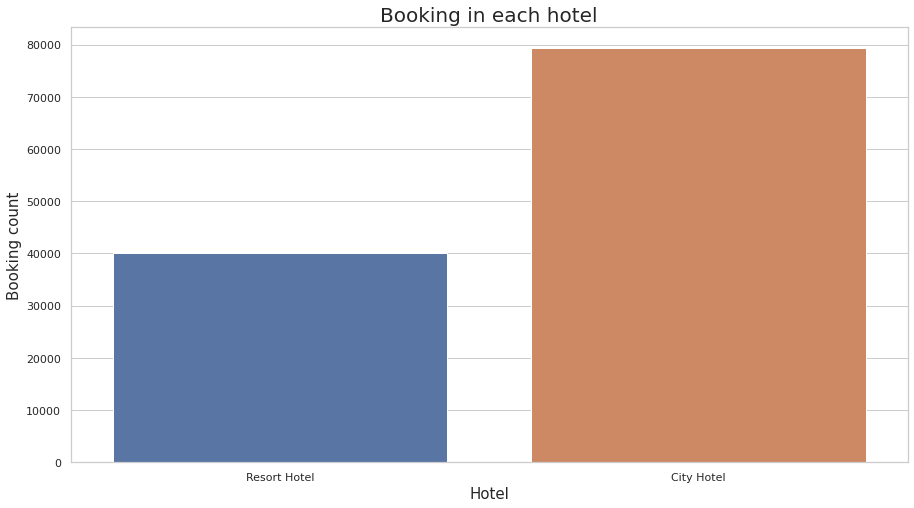

In [26]:
#

plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.countplot(x="hotel",data=df_hotel)
plt.xlabel("Hotel",size=15)
plt.ylabel("Booking count",size=15)
plt.title("Booking in each hotel",size=20)


print(df_hotel["hotel"].value_counts(normalize=True))

### city hotel is more prefered compared to resort hotel (more then 65% booking is from city hotel while resort hotel has 33% of booking

## Which month is busiest or prefered by Guest ?

[Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'December'),
 Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June')]

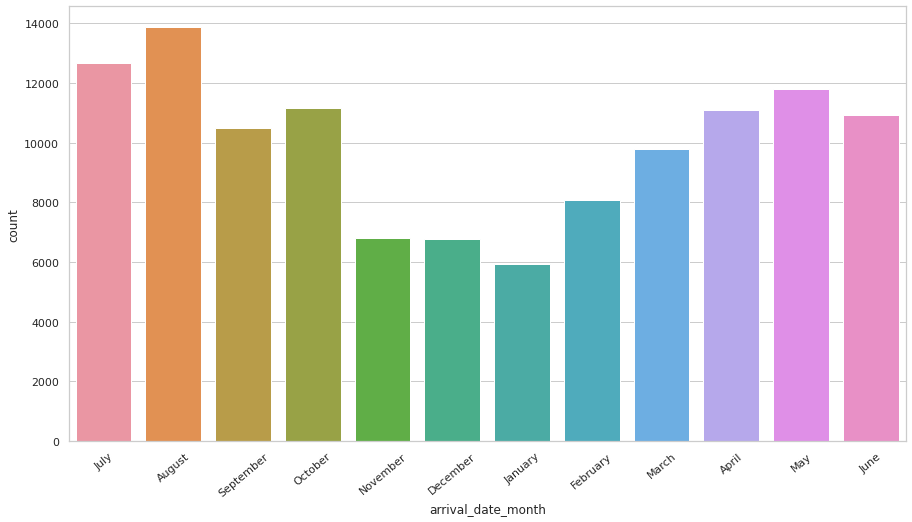

In [27]:
# which is the busiest month

plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
ax=sns.countplot(x="arrival_date_month",hue_order="arrival_date_month",data=df_hotel)
ax.set_xticklabels(ax.get_xticklabels (), rotation=40) 

### July,Auguest are busiest month while january is least busiest month it is because of holiday in summer people prefer vaction in that months, while due to winter in january people less prefere vaction in this month



## Which hotel has Higher Cancelation Rate ?

In [28]:
cancel_booking=df_hotel[df_hotel["is_canceled"]==1]
hotel_cancel_group=cancel_booking.groupby("hotel")
df1=pd.DataFrame(hotel_cancel_group.size()).rename(columns={0:"Total cancel booking"})
df1

hotel_booking=df_hotel.groupby("hotel")
total_booking=hotel_booking.size()
df2=pd.DataFrame(total_booking).rename(columns={0:"Total booking"})
df2

# concate

df3=pd.concat([df1,df2],axis=1)
df3

# % of cancel bookig 

df3["% of cancel booking"]=round(df3["Total cancel booking"]/df3["Total booking"]*100,2)
df3


,Total cancel booking,Total booking,% of cancel booking
hotel,,,
City Hotel,33102,79330,41.73
Resort Hotel,11122,40060,27.76


Text(0.5, 1.0, 'Booking canceled in each hotel')

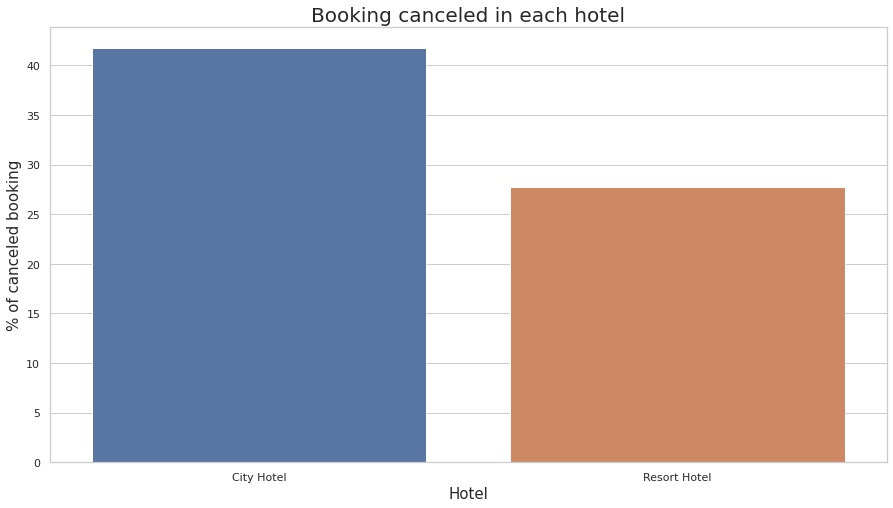

In [29]:
# bar graph of booking Cancelation

plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.barplot(x=df3.index,y=df3["% of cancel booking"])
plt.xlabel("Hotel",size=15)
plt.ylabel("% of canceled booking",size=15)
plt.title("Booking canceled in each hotel",size=20)

### As **City Hotel has 41%**  Booking cancelation Rate while Resort hotel has 27%  booking Cncelation Rate, so Cancelation rate is higher in City Hotel Compared to Resort Hotel

## Average Waiting Days in each hotel ?

In [30]:
# dataframe of each hotel type with respect to average waiting days

groupby_hotel=df_hotel.groupby("hotel")
df4=pd.DataFrame(groupby_hotel["days_in_waiting_list"].mean().reset_index().rename(columns={"days_in_waiting_list":"Avg. waiting days"}))
df4

,hotel,Avg. waiting days
0,City Hotel,3.226774
1,Resort Hotel,0.527758


Text(0.5, 1.0, 'average waiting days in each hotel')

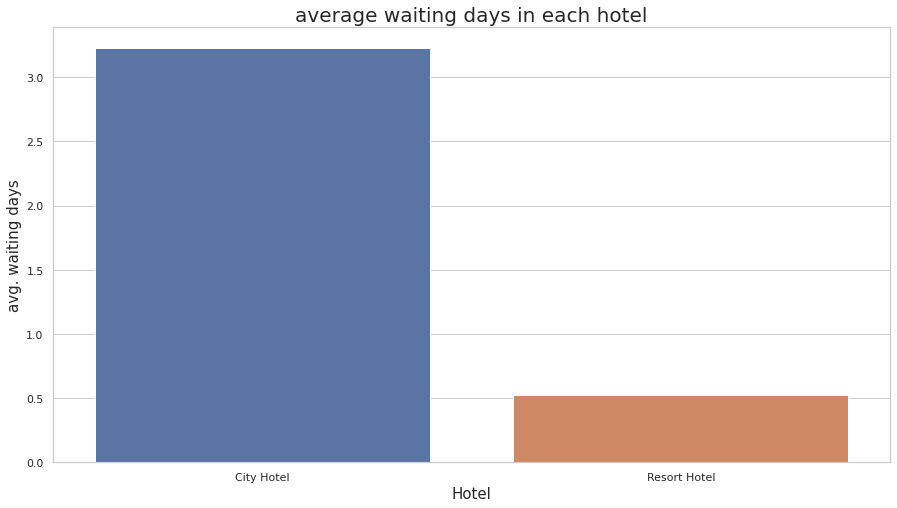

In [31]:
# bar plot of average waiting days

plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.barplot(x=df4["hotel"],y=df4["Avg. waiting days"],data=df_hotel)
plt.xlabel("Hotel",size=15)
plt.ylabel("avg. waiting days",size=15)
plt.title("average waiting days in each hotel",size=20)

### Average Waiting Days in city hotel is approximatly 3 days, while in resort Hotel average Waiting days is approximatly 0 days (it is maybe due to city hotel is in the city while resort hotel is large than the city its mostly outside of city because of this people prefered city hotel and has more waiting days.

## Which Hotel has more Revenue ?

In [32]:
# dataframe of average adr in each hotel

df5=pd.DataFrame(groupby_hotel["adr"].mean().reset_index().rename(columns={"adr":"average adr"}))
df5

,hotel,average adr
0,City Hotel,105.304465
1,Resort Hotel,94.952930


Text(0.5, 1.0, 'average daily rate in each hotel')

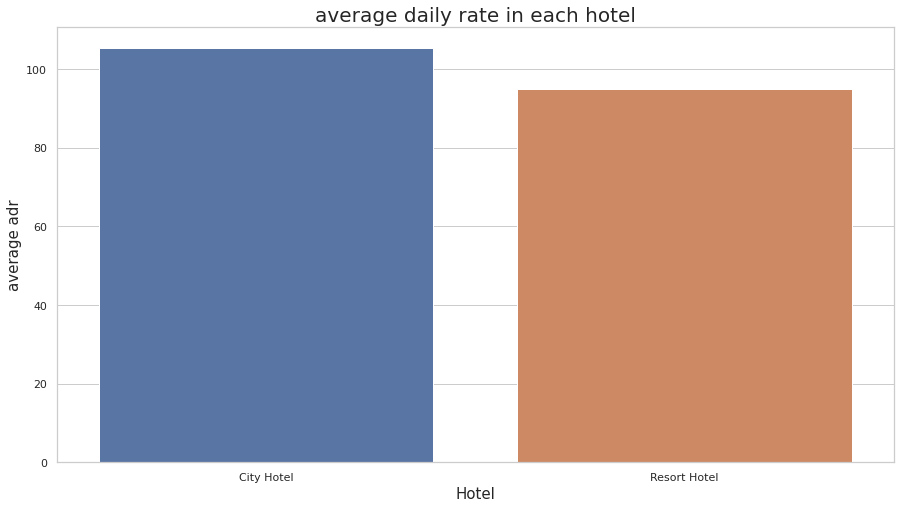

In [33]:
# bar graph of hotel revenue

plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
ax=sns.barplot(x=df5["hotel"],y=df5["average adr"])
plt.xlabel("Hotel",size=15)
plt.ylabel("average adr",size=15)
plt.title("average daily rate in each hotel",size=20)


### City Hotel has slightly more revenue compared to Resort hotel

## How many people are repeated in each hotel ?

0    0.968088
1    0.031912
Name: is_repeated_guest, dtype: float64
0     0.848597
1     0.106382
2     0.031870
3     0.007764
4     0.003149
5     0.000988
6     0.000528
7     0.000260
8     0.000142
9     0.000067
10    0.000050
13    0.000042
14    0.000042
15    0.000025
16    0.000017
17    0.000017
12    0.000017
11    0.000017
20    0.000008
21    0.000008
18    0.000008
Name: booking_changes, dtype: float64


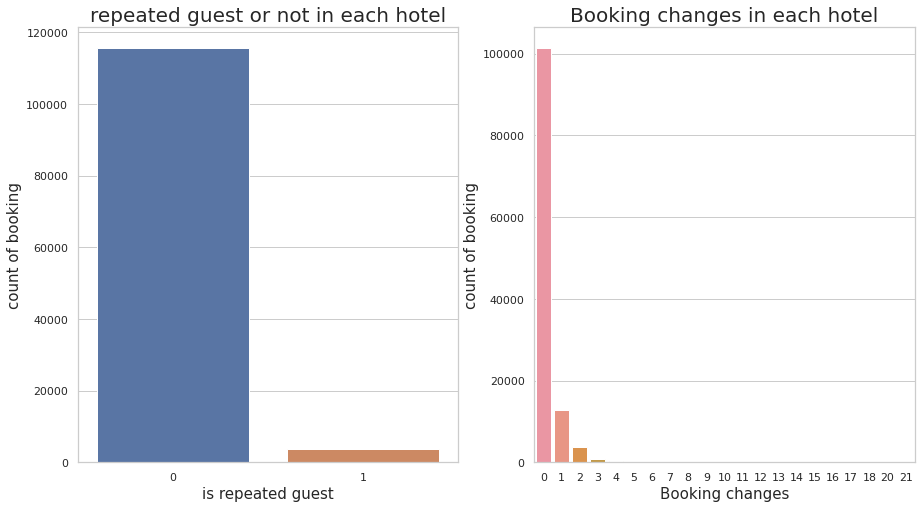

In [34]:


plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
plt.subplot(1,2,1)
ax=sns.countplot(x="is_repeated_guest",data=df_hotel)
plt.xlabel("is repeated guest",size=15)
plt.ylabel("count of booking",size=15)
plt.title("repeated guest or not in each hotel",size=20)
print(df_hotel["is_repeated_guest"].value_counts(normalize=True))

plt.subplot(1,2,2)
ax=sns.countplot(x="booking_changes",data=df_hotel)
plt.xlabel("Booking changes",size=15)
plt.ylabel("count of booking",size=15)
plt.title("Booking changes in each hotel",size=20)
print(df_hotel["booking_changes"].value_counts(normalize=True))

### Only 4% of Guest/customer are repeated in both hotel this may be loyal customer to the hotel which are repeated

### Almost 85% guest/customers are not changes Booking

## Who has biggest booking Distribution channel and Market Segment

TA/TO        0.819750
Direct       0.122665
Corporate    0.055926
GDS          0.001617
Undefined    0.000042
Name: distribution_channel, dtype: float64
Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64


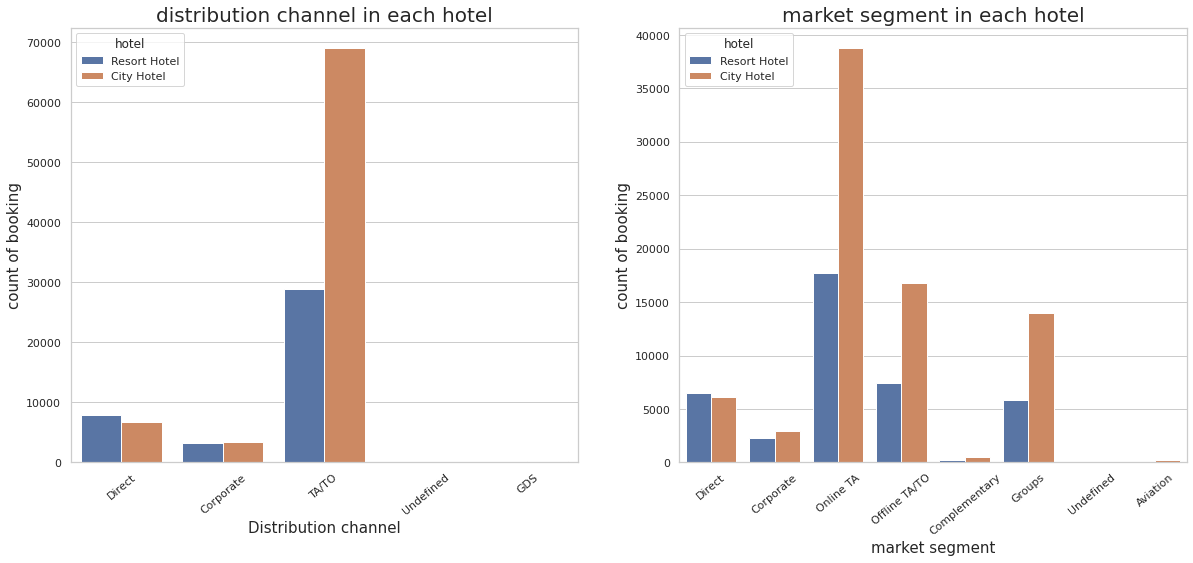

In [35]:
plt.figure(figsize=(20,8))
sns.set_theme(style="whitegrid")
plt.subplot(1,2,1)
ax=sns.countplot(x="distribution_channel",hue="hotel",data=df_hotel)
ax.set_xticklabels(ax.get_xticklabels (), rotation=40) 
plt.xlabel("Distribution channel",size=15)
plt.ylabel("count of booking",size=15)
plt.title("distribution channel in each hotel",size=20)

print(df_hotel["distribution_channel"].value_counts(normalize=True))
plt.subplot(1,2,2)
ax=sns.countplot(x="market_segment",hue="hotel",data=df_hotel)
ax.set_xticklabels(ax.get_xticklabels (), rotation=40) 
plt.xlabel("market segment",size=15)
plt.ylabel("count of booking",size=15)
plt.title("market segment in each hotel",size=20)


print(df_hotel["market_segment"].value_counts(normalize=True))

###  TA/TO(Travel Agent/Tour Operator) has biggest distribution channel with 79% of Distribution while second highest booking is direct Booking

### TA(Travel Agent) Online is biggest market sagment and second and third are offline(TA/TO) and groups respectively

## Cancelation rate in Distribution Channel and Market segment in each hotel

Text(0.5, 1.0, 'Booking Canceled in market segment in each hotel')

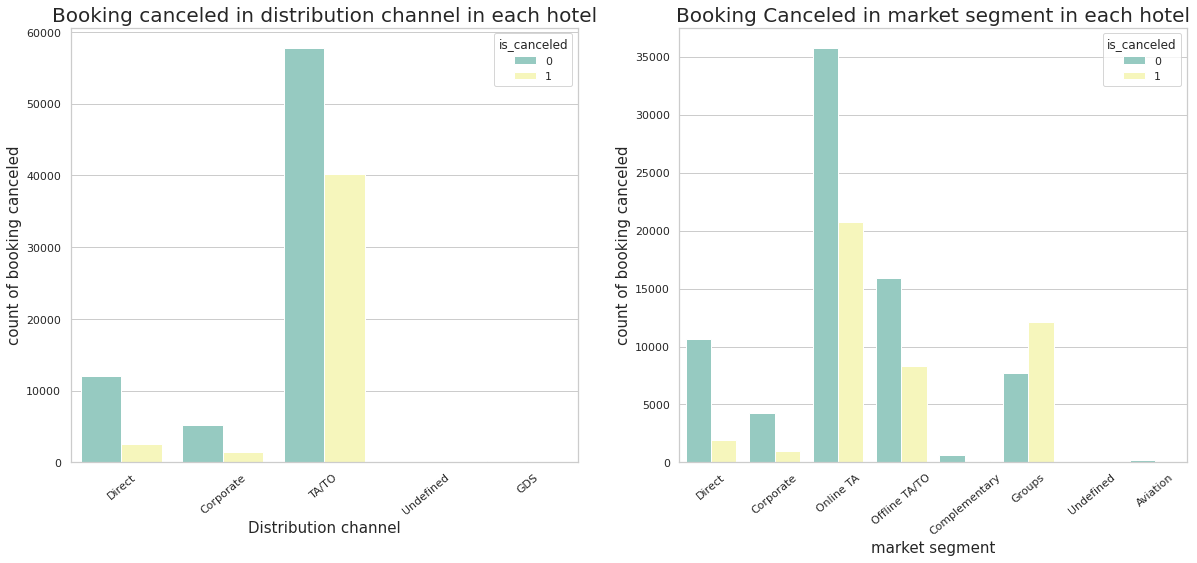

In [36]:
plt.figure(figsize=(20,8))
sns.set_theme(style="whitegrid")
plt.subplot(1,2,1)
ax=sns.countplot(x="distribution_channel",hue="is_canceled",palette="Set3",data=df_hotel)
ax.set_xticklabels(ax.get_xticklabels (), rotation=40) 
plt.xlabel("Distribution channel",size=15)
plt.ylabel("count of booking canceled",size=15)
plt.title("Booking canceled in distribution channel in each hotel",size=20)

plt.subplot(1,2,2)
ax=sns.countplot(x="market_segment",hue="is_canceled",palette="Set3",data=df_hotel)
ax.set_xticklabels(ax.get_xticklabels (), rotation=40) 
plt.xlabel("market segment",size=15)
plt.ylabel("count of booking canceled",size=15)
plt.title("Booking Canceled in market segment in each hotel",size=20)

### TA/TO(Travel Agent/Tour Operator) has highest cancelation rate in Distribution Channel among all tha distribution and lowest in direct and corporate respectively

### online TA(Travel Agent) has highest cancelation rate in Market segment among all the market segment and offline TA/TO and Groups has lower cancelation rate than online TA 

## What Deposite policy used in Hotel ?

No Deposit    0.876464
Non Refund    0.122179
Refundable    0.001357
Name: deposit_type, dtype: float64


Text(0.5, 1.0, 'canceled Booking vs Deposite in each hotel')

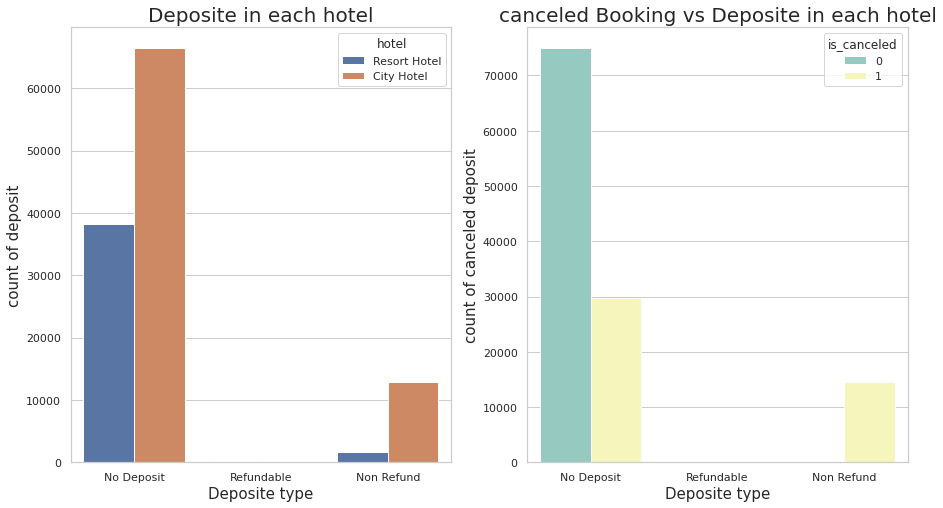

In [37]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
plt.subplot(1,2,1)
ax=sns.countplot(x="deposit_type",hue="hotel",data=df_hotel)
plt.xlabel("Deposite type",size=15)
plt.ylabel("count of deposit",size=15)
plt.title("Deposite in each hotel",size=20)
print(df_hotel["deposit_type"].value_counts(normalize=True))

plt.subplot(1,2,2)
ax=sns.countplot(x="deposit_type",hue="is_canceled",palette="Set3",data=df_hotel)
plt.xlabel("Deposite type",size=15)
plt.ylabel("count of canceled deposit",size=15)
plt.title("canceled Booking vs Deposite in each hotel",size=20)


### No Deposite type is most popular in each resort and city hotel may this is the reasone of higher cancelation in hotel, that gives flexibility to customer to book hotel without deposit 

### As see in canceled booking in hotel Non refund booking has second highest cancelation let's see

In [38]:
non_refund_deposit=df_hotel.groupby("deposit_type")["lead_time"].mean()

In [39]:
non_refund_deposit.reset_index().rename(columns={"deposit_type":"Deposit type","lead_time":"Lead time"})

,Deposit type,Lead time
0,No Deposit,88.756615
1,Non Refund,212.908891
2,Refundable,152.098765


### Non refund Booking has higher cancelation because of longer lead time(date of booking till date arrival),so longer the Lead time higher chance of cancelation of booking, Non refundable Deposite has higher average lead time of (212) days as seen above

## What is Average Daily Rate of Hotel ?

Text(0.5, 1.0, 'Average daily rate')

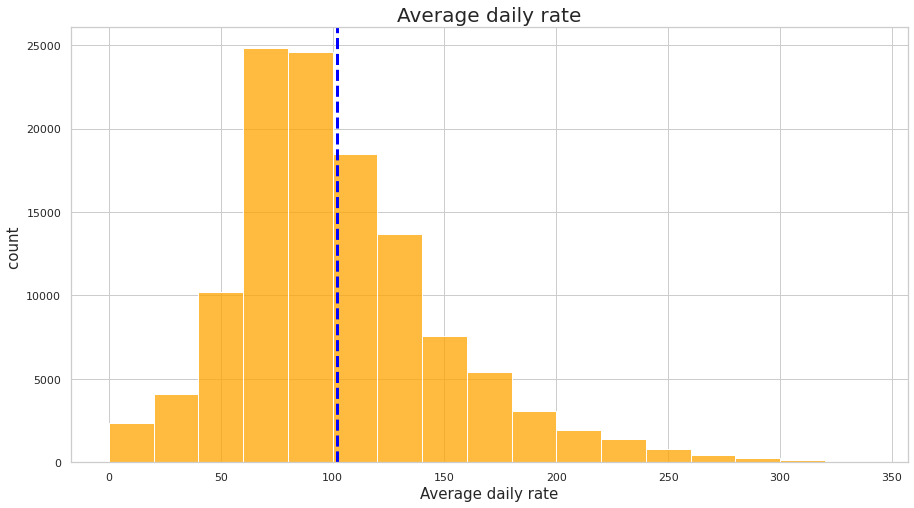

In [40]:
# histrogram of average daily rate 

plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
bins_=[i for i in range(0,350,20)]
ax=sns.histplot(x="adr",bins=bins_,data=df_hotel,color="orange")
plt.axvline(df_hotel["adr"].mean(),color="blue",linewidth=3,linestyle="--")
plt.xlabel("Average daily rate",size=15)
plt.ylabel("count ",size=15)
plt.title("Average daily rate",size=20)


### Most hotel has Average daily rate between (50 to 150)
### Few hotels has Average Daily Rate more than 150
### Blue dotted line represent mean of ADR


Text(0.5, 1.0, 'Average daily rate vs Month')

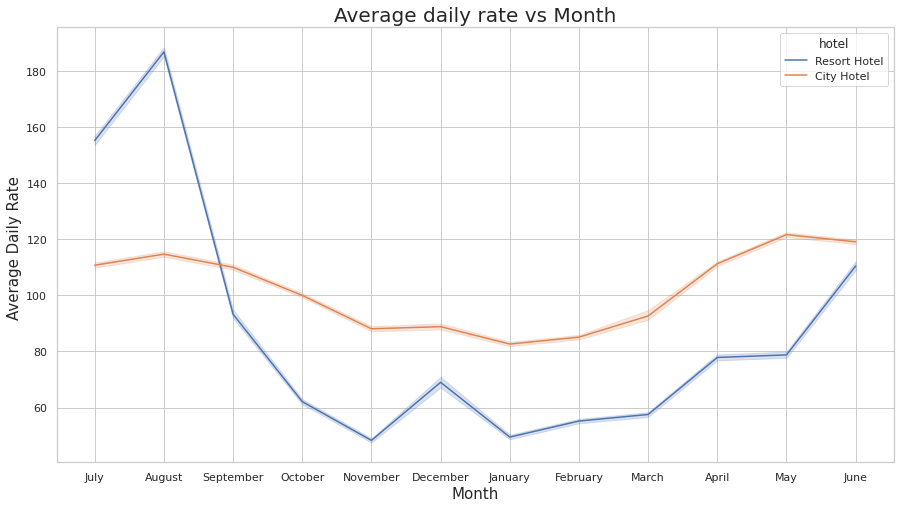

In [41]:
# line plot between month vs adr

plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
ax=sns.lineplot(x="arrival_date_month",y="adr",hue="hotel",data=df_hotel)
plt.xlabel("Month",size=15)
plt.ylabel("Average Daily Rate ",size=15)
plt.title("Average daily rate vs Month",size=20)


### Resort hotel has highest ADR in Auguest month while less ADR in other months.
### city hotel has high ADR in may,jun,july,auguest Months while less ADR in other Months.

Text(0.5, 1.0, 'Meal Type in Hotel')

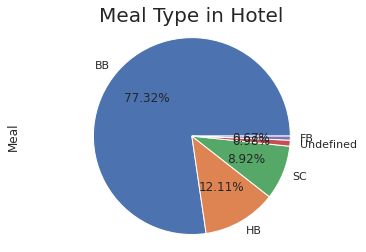

In [42]:
# pie chart of different Meal type in hotel 

fig1,ax1=plt.subplots()
data=df_hotel["meal"].value_counts().tolist()
labels=df_hotel["meal"].value_counts().index.tolist()
plt.pie(data,labels=labels,explode=[0.0,0,0,0,0],autopct="%0.2f%%",radius=5)
ax1.axis("equal")
plt.ylabel("Meal")
plt.title("Meal Type in Hotel",fontsize=20)

### Bed and Breakfast is most popular meal package compared to other meal package while Full Board meal package is least popular among other meal package

## Average daily rate in months in 2015,2016,2017 year

Text(0.5, 1.0, 'Average daily rate of month in year')

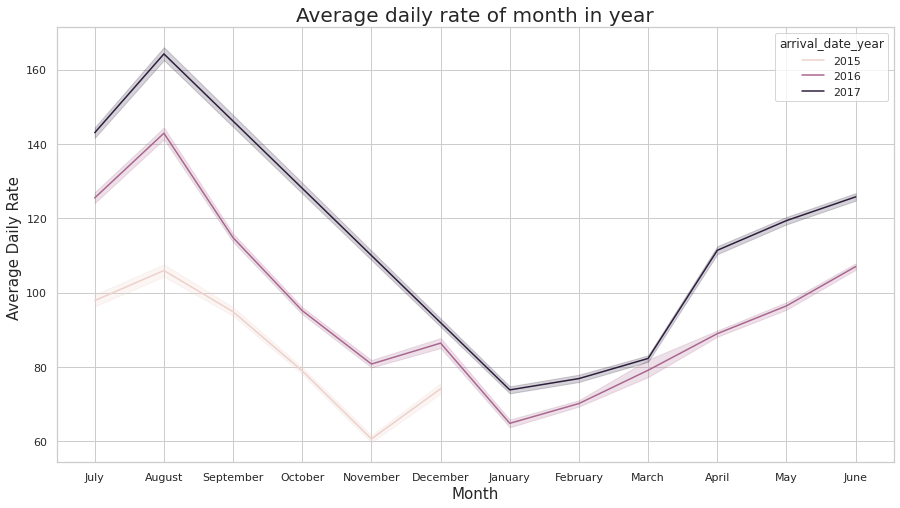

In [45]:
# line plot of adr in  month and year

plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
ax=sns.lineplot(x="arrival_date_month",y="adr",hue="arrival_date_year",data=df_hotel)
plt.xlabel("Month",size=15)
plt.ylabel("Average Daily Rate ",size=15)
plt.title("Average daily rate of month in year",size=20)


### Auguest is most popular/visit month in 2015,2016,2017 year , most booking is in this month and lowest january is lowest month of hotel booking.

## Correlation of features

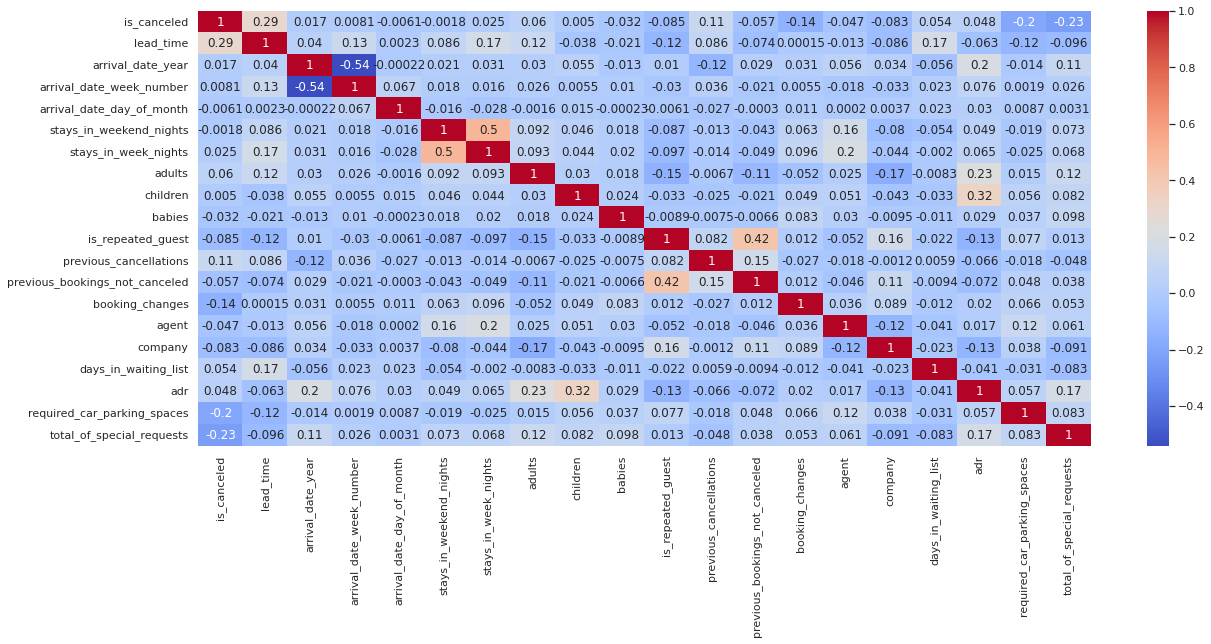

In [49]:
plt.figure(figsize=(20,8))
correlation=df_hotel.corr()
sns.heatmap(correlation,cmap="coolwarm",annot=True)

from correlation heatmap Is_canceled and Lead time are very important features, while as seen if customer is repeated than that customer may not previously canceled booking

In [50]:
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Guest/Customer Required car parking space 

Text(0.5, 1.0, 'Require car parking space')

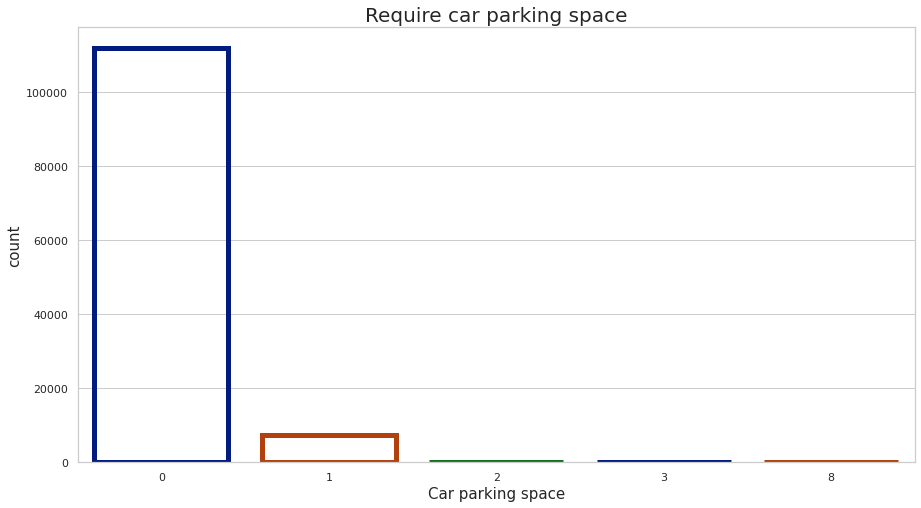

In [61]:


plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.countplot(x="required_car_parking_spaces",data=df_hotel,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
plt.xlabel("Car parking space",size=15)
plt.ylabel("count",size=15)
plt.title("Require car parking space",size=20)


### As seen in graph very less number of guest required place of car parking.

Text(0.5, 1.0, 'previously booking canceled vs is repeated guest')

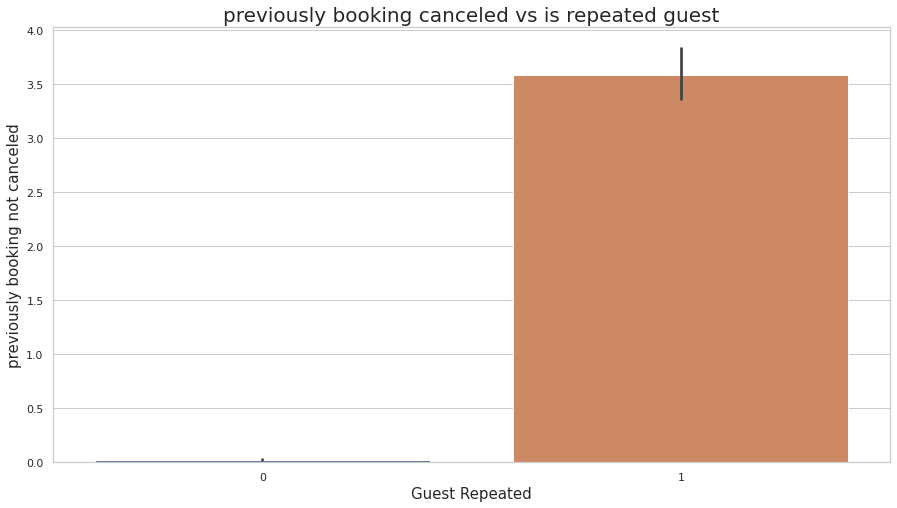

In [67]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
ax=sns.barplot(x="is_repeated_guest",y="previous_bookings_not_canceled",data=df_hotel)
plt.xlabel("Guest Repeated",size=15)
plt.ylabel("previously booking not canceled",size=15)
plt.title("previously booking canceled vs is repeated guest",size=20)

## Those Guest/Customer which is not canceled their booking previously is repeated guest which seems to be loyal guest to that hotel